In [3]:
#Question 1
import pandas as pd

df = pd.read_csv('cybersecuritydata.csv')
print(df)

#Link: https://data.tempe.gov/datasets/tempegov::5-12-cybersecurity-detail/explore

#This is the data from the Cybersecurity Framework provided by the National Institute of Standards and Technology that-
#-determines the maturity level of cybersecurity programs. The data lists the control sets (standards) that the programs-
#-have to follow and the compliance grades for those sets that they recieve per fiscal year quarter. The NIST scores do-
#-not follow a 0-100 scoring system but a -203-110 system.

#Inquiry Question: What controls are subject to the highest compliance scores?
#Sub-Question 1: Are controls with higher standards subject to harsher scoring?
#Sub-Question 2: How does the scoring of each control vary per year?
#Sub-Question 3: What control has the highest compliance score and which control has the lowest compliance score?

     Year                    Date              Control_Set  Control  \
0    2022  2022/12/31 07:00:00+00  NIST SP 800-53 (Rev. 5)   NIST 1   
1    2022  2022/12/31 07:00:00+00  NIST SP 800-53 (Rev. 5)   NIST 2   
2    2022  2022/12/31 07:00:00+00  NIST SP 800-53 (Rev. 5)   NIST 3   
3    2022  2022/12/31 07:00:00+00  NIST SP 800-53 (Rev. 5)   NIST 4   
4    2022  2022/12/31 07:00:00+00  NIST SP 800-53 (Rev. 5)   NIST 5   
..    ...                     ...                      ...      ...   
147  2016  2016/12/31 07:00:00+00                 NIST CSF  NIST 19   
148  2016  2016/12/31 07:00:00+00                 NIST CSF  NIST 20   
149  2016  2016/12/31 07:00:00+00                 NIST CSF  NIST 21   
150  2016  2016/12/31 07:00:00+00                 NIST CSF  NIST 22   
151  2016  2016/12/31 07:00:00+00                 NIST CSF  NIST 23   

                                  Control_Name Control_Family_Code  \
0                               Access Control                  AC   
1      

In [3]:
#Question 2

import pandas as pd
df = pd.read_csv('cybersecuritydata.csv')

#A: Only using year, control_set, compliance_score, and control_name. Removing date, definition, control, control_family_code, reporting_date, and objectid.
cols = df.columns   
remove = ['Date']
df.drop(remove, inplace=True, axis=1)
remove = ['Control']
df.drop(remove, inplace=True, axis=1)
remove = ['Control_Family_Code']
df.drop(remove, inplace=True, axis=1)
remove = ['Reporting_Date']
df.drop(remove, inplace=True, axis=1)
remove = ['ObjectId']
df.drop(remove, inplace=True, axis=1)
remove = ['Definition']
df.drop(remove, inplace=True, axis=1)
print(df.shape)

#B: Some empty data in the definition column and control family code columns. Data uneeded as controls are repeated and information is already given. (Unused columns)
#C: No duplicates to be removed
#D: (Checked datatypes, all that are used are correct)
#E: No inconsistent inputs
#F: No outliers that are removable.

(152, 5)


The number of controls under NIST CSF is: 112
The number of controls under NIST SP 800-53 (Rev. 5) is: 40

The compliance score averages for the CSF standards and the SP standards are as follows:

               Control_Set  Compliance_Score
0                 NIST CSF         63.089286
1  NIST SP 800-53 (Rev. 5)         61.625000


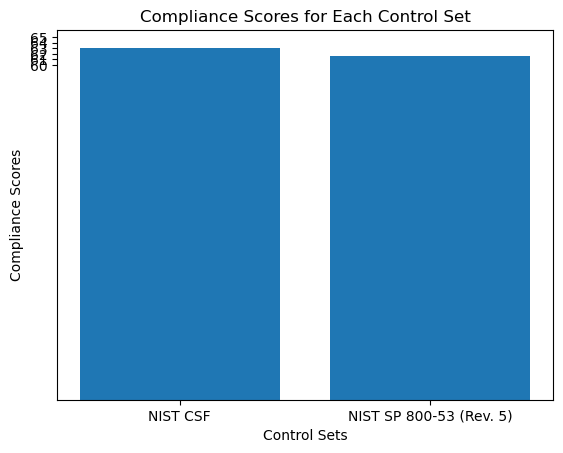

In [4]:
#Question 3
#NIST SP 800-53 (Rev. 5) provides much stricter standards within the control sets. NIST CSF has some overlap with Rev. 5 but provides a broader spectrum of grading.
import pandas as pd
from matplotlib import pyplot as plt

#Sub-question 1: Are controls with higher standards subject to harsher scoring?
df = pd.read_csv('cybersecuritydata.csv')
countcsf = df['Control_Set'].value_counts()['NIST CSF']
print(f"The number of controls under NIST CSF is: {countcsf}")

countrev = df['Control_Set'].value_counts()['NIST SP 800-53 (Rev. 5)']
print(f"The number of controls under NIST SP 800-53 (Rev. 5) is: {countrev}\n")

average = df.groupby('Control_Set', as_index=False)['Compliance_Score'].mean()
print("The compliance score averages for the CSF standards and the SP standards are as follows:\n")
print(average)

plt.bar(average.iloc[:, 0], average.iloc[:, 1] )
plt.title('Compliance Scores for Each Control Set')
plt.xlabel('Control Sets')
plt.ylabel('Compliance Scores')
plt.yticks([60, 61, 62, 63, 64, 65]) 

plt.show()

#My findings have led me to understand that control sets are not bound by harsher scoring. Instead, they are strangely-
#-alike. Unfortunately, my data has not helped me to see if my hypothesis was right or wrong as the averages are too-
#-close together and do not present a clear answer. I can only determine that the compliance scores are not affected by-
#-strict scoring, but rather they are scored slightly differently.

2016:
Control_Name        Access Control
Compliance_Score                80
Name: 135, dtype: object
2017:
Control_Name        Access Control
Compliance_Score                76
Name: 113, dtype: object
2018:
Control_Name        Access Control
Compliance_Score                28
Name: 91, dtype: object
2021:
Control_Name        Access Control
Compliance_Score                72
Name: 20, dtype: object
2022:
Control_Name        Access Control
Compliance_Score                18
Name: 0, dtype: object


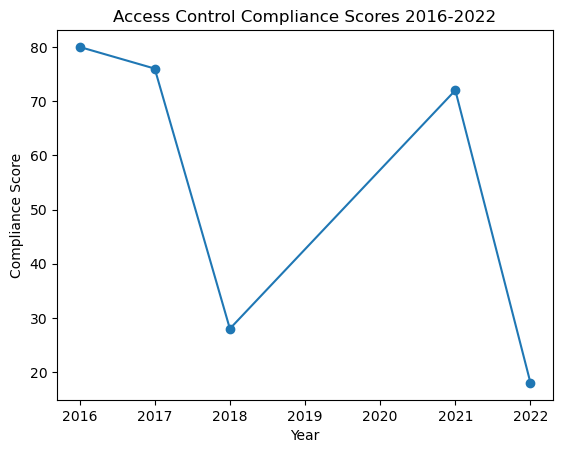

In [16]:
#Sub-question 2: How does the scoring of each control vary per year?

import pandas as pd
from matplotlib import pyplot as plt

#To avoid having to read a large chunk of data, I chose to pick one Control_Name and determine the score changes 2016-2022.

df = pd.read_csv('cybersecuritydata.csv')
row2016 = 135
col2016 = ['Control_Name', 'Compliance_Score']

year2016 = df.iloc[row2016, df.columns.isin(col2016)]
print("2016:")
print(year2016)

row2017 = 113
col2017 = ['Control_Name', 'Compliance_Score']

year2017 = df.iloc[row2017, df.columns.isin(col2017)]
print("2017:")
print(year2017)

row2018 = 91
col2018 = ['Control_Name', 'Compliance_Score']

year2018 = df.iloc[row2018, df.columns.isin(col2018)]
print("2018:")
print(year2018)

row2021 = 20
col2021 = ['Control_Name', 'Compliance_Score']

year2021 = df.iloc[row2021, df.columns.isin(col2021)]
print("2021:")
print(year2021)

row2022 = 0
col2022 = ['Control_Name', 'Compliance_Score']

year2022 = df.iloc[row2022, df.columns.isin(col2022)]
print("2022:")
print(year2022)

#Line Chart for above data
years = [2016, 2017, 2018, 2021, 2022]
values = [80, 76, 28, 72, 18]

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Compliance Score')
plt.title('Access Control Compliance Scores 2016-2022')

plt.show()

#The result of my findings was inconsistent to say the least. There was a steep decline in scoring from 2016 to 2018.-
#There was a gap in information in which the access control did not submit their Framecore for scoring. However-
#-once they began submitting again, they scored high with a 72 and the following year, hit their lowest score with an 18.-
#This data presents no steady increase or decrease in scoring based on year.

Minimum value in 'Compliance_Score': 18
Row where the minimum value occurs:
   Year              Control_Set    Control_Name  Compliance_Score
0  2022  NIST SP 800-53 (Rev. 5)  Access Control                18
Maximum value in 'Compliance_Score': 100
Row(s) where the maximum values occur:
     Year Control_Set            Control_Name  Compliance_Score
122  2017    NIST CSF       Response Planning               100
127  2017    NIST CSF       Recovery Planning               100
131  2016    NIST CSF    Business Environment               100
138  2016    NIST CSF  Information Protection               100
149  2016    NIST CSF       Recovery Planning               100


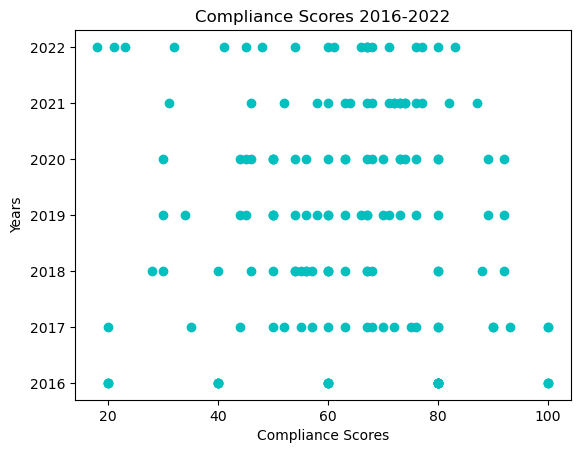

In [23]:
#Sub-Question 3: What control has the highest compliance score and which control has the lowest compliance score?

import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('cybersecuritydata.csv')

#Revove unneeded columns
cols = df.columns   
remove = ['Date']
df.drop(remove, inplace=True, axis=1)
remove = ['Control']
df.drop(remove, inplace=True, axis=1)
remove = ['Control_Family_Code']
df.drop(remove, inplace=True, axis=1)
remove = ['Reporting_Date']
df.drop(remove, inplace=True, axis=1)
remove = ['ObjectId']
df.drop(remove, inplace=True, axis=1)
remove = ['Definition']
df.drop(remove, inplace=True, axis=1)

column_name = 'Compliance_Score'

min_value = df[column_name].min()
min_rows = df[df[column_name] == min_value]

print(f"Minimum value in '{column_name}': {min_value}")
print("Row where the minimum value occurs:")
print(min_rows)

max_value = df[column_name].max()
max_rows = df[df[column_name] == max_value]

print(f"Maximum value in '{column_name}': {max_value}")
print("Row(s) where the maximum values occur:")
print(max_rows)

x = df['Compliance_Score']
y = df['Year']

plt.scatter(x, y, marker = 'o', color = 'c')
plt.xlabel('Compliance Scores')
plt.ylabel('Years')
plt.title('Compliance Scores 2016-2022')
plt.show()

#The following data shows that only one control had the lowest score of 18 but multiple controls shared the highest. In the-
#-beginning of my report, I shared that the highest score possible was 110. However, out of the several that had high scores
#-they only ever reached 100. This begs another question as to why so many different controls were able to obtain the same-
#-score. Also, its important to note that the lowest score came from the Rev. 5 control set while every single one of the-
#-high scores came from the CSF control set.

Inquiry Question: What controls are subject to the highest compliance scores?

From my data and findings, I've determined that the NIST CSF control set is subject to the highest compliance scores. It seems that the Rev. 5 control set does in fact make it more difficult to uphold the standards that are required to reach the higher Framecore scoring. The lowest compliance scores all come from the NIST Rev. 5 control set and the highest ones come from CSF. What I failed to discover was a pattern in the scoring throughout the years from each specific control. Some years certain controls had relatively high scoring and some years it was much lower. There is no consistency of the scores based on my graphs of the averages, highest and lowest, and scatter of all the scoring. Thankfully, the only thing I was able to determine is that because CSF offers looser rules of compliance and lower standardization for testing, it is easier and more likely for controls to obtain higher compliance scores- as seen from the retreived data from the csv file.